In [ ]:
#Source: https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

!pip install yfinance

import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import time
import requests
import io

In [ ]:
!pip install giotto-tda

In [ ]:
from gtda.homology import VietorisRipsPersistence

In [ ]:
import gtda.diagrams

In [ ]:
start = datetime.datetime(1987,12,22)
end = datetime.datetime(2016,12,8)
Symbols = ['^GSPC','^DJI','^IXIC','^RUT']

In [ ]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,1 : ^DJI,2 : ^IXIC,3 : ^RUT,

In [ ]:
gspc_1 = stock_final[stock_final['Name'] == '^GSPC'].index
gspc = stock_final[stock_final['Name'] == '^GSPC']['Close']
dji_1 = stock_final[stock_final['Name'] == '^DJI'].index
dji = stock_final[stock_final['Name'] == '^DJI']['Close']
ixic_1 = stock_final[stock_final['Name'] == '^IXIC'].index
ixic = stock_final[stock_final['Name'] == '^IXIC']['Close']
rut_1 = stock_final[stock_final['Name'] == '^RUT'].index
rut = stock_final[stock_final['Name'] == '^RUT']['Close']

In [ ]:
import math
adjusted_gspc = []
adjusted_dji = []
adjusted_ixic = []
adjusted_rut = []
for i in range(1,7301):
  adjusted_gspc.append(math.log(gspc[i]/gspc[i-1]))
  #adjusted_dji.append(math.log(dji[i]/dji[i-1]))
  adjusted_ixic.append(math.log(ixic[i]/ixic[i-1]))
  adjusted_rut.append(math.log(rut[i]/rut[i-1]))

In [ ]:
adjusted_prices = pd.DataFrame()
adjusted_prices['Dates'] = gspc_1[1:]
adjusted_prices['GSPC'] = adjusted_gspc
#adjusted_prices['DJI'] = adjusted_dji
adjusted_prices['IXIC'] = adjusted_ixic
adjusted_prices['RUT'] = adjusted_rut
adjusted_prices.to_csv('Adjusted_prices.csv')

In [ ]:
!zip Adjusted_prices.zip *.csv
!mv Adjusted_prices.zip "/content/drive/My Drive"

  adding: Adjusted_prices.csv (deflated 58%)


In [ ]:
l_1 = []
l_2 = []

for i in range(0, 7300-100):
  point_cloud = []
  for j in range(i,i+100):
    point_cloud.append([adjusted_gspc[j], adjusted_ixic[j], adjusted_rut[j]])
  pointcloud = np.array(point_cloud).reshape(1,100,3)
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  value = gtda.diagrams.Amplitude(metric_params={"n_layers":250} , metric ='landscape', order = None).fit_transform(diagrams)
  l_1.append(value[0][0])
  l_2.append(value[0][1])

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

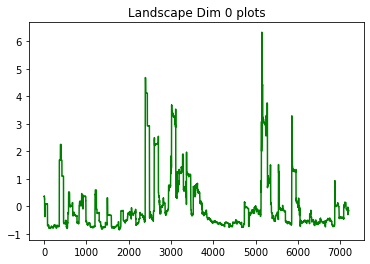

In [ ]:
#Landscape dim 0 plots:
plt.title("Landscape Dim 0 plots") 
y_1 = stats.zscore(np.array(l_1))
plt.plot(np.arange(0,7200), y_1 , color ="green")  
plt.show()

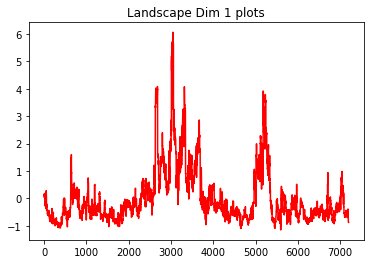

In [ ]:
#Landscape dim 1 plots:
plt.title("Landscape Dim 1 plots") 
y_2 = stats.zscore(np.array(l_2))
plt.plot(np.arange(0,7200), y_2 , color ="red")  
plt.show()

In [ ]:
ord_1 = np.argsort(-y_1)[:100]
ord_2 = np.argsort(-y_2)[:100]

In [ ]:
#First 100 highest valuescorresponding to dim 0
gspc_1[ord_1]

DatetimeIndex(['2008-05-22', '2008-05-21', '2008-05-23', '2008-05-27',
               '2008-05-28', '2008-06-05', '2008-06-04', '2008-06-03',
               '2008-05-29', '2008-05-30', '2008-06-02', '1997-06-09',
               '1997-06-06', '1997-06-10', '1997-06-11', '1997-06-13',
               '1997-06-16', '1997-06-17', '1997-06-18', '1997-06-12',
               '1997-06-19', '1997-06-20', '1997-06-05', '2008-06-17',
               '2008-06-13', '2008-06-23', '2008-06-18', '2008-06-19',
               '2008-06-20', '2008-06-16', '2008-06-12', '2008-06-11',
               '2008-06-06', '2008-06-10', '2008-06-09', '1997-08-08',
               '1997-08-11', '1997-08-12', '1997-08-13', '1997-08-14',
               '1997-07-25', '1997-07-28', '1997-08-05', '1997-08-04',
               '1997-08-01', '1997-07-31', '1997-07-30', '1997-08-06',
               '1997-07-24', '1997-08-07', '1997-07-18', '1997-07-22',
               '1997-07-29', '1997-07-23', '1997-07-02', '1997-06-26',
      

In [ ]:
#First 100 highest valuescorresponding to dim 1
gspc_1[ord_2]

DatetimeIndex(['2000-01-11', '1999-12-01', '1999-11-30', '2000-01-24',
               '2000-01-25', '2000-01-26', '1999-12-02', '1999-11-29',
               '2000-01-27', '1999-12-07', '1999-12-06', '1999-12-03',
               '2000-01-12', '2000-01-13', '2000-01-19', '2000-01-18',
               '1999-11-23', '2000-01-14', '2000-01-20', '1999-11-18',
               '1999-11-19', '1999-11-22', '1999-11-24', '2000-01-21',
               '1999-11-26', '2000-01-03', '1999-12-31', '1999-12-30',
               '1999-12-29', '2000-01-04', '2000-01-05', '2000-01-07',
               '2000-01-10', '2000-01-06', '1999-12-09', '1999-12-08',
               '1998-07-29', '2001-02-06', '2001-02-07', '1999-12-14',
               '1999-12-13', '1999-12-10', '1998-07-28', '1999-12-15',
               '1999-12-21', '1999-12-22', '1998-06-02', '1998-06-03',
               '2001-02-05', '1998-06-01', '1998-05-29', '1998-07-31',
               '1998-08-03', '1998-05-28', '1998-07-08', '1998-07-30',
      

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



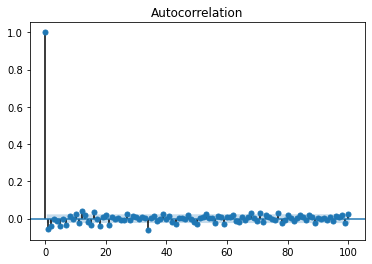

In [ ]:
import matplotlib.pyplot as plt
#Auto Correlation Plots
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(adjusted_prices['GSPC'], lags=100)
plt.show()

In [ ]:
!pip install kmapper
!pip install umap-learn

In [ ]:
import umap
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import ensemble
import kmapper as km
import matplotlib.pyplot as plt

In [ ]:
from io import BytesIO
from PIL import Image
import base64

In [ ]:
pl_brewer = [[0.0, '#006837'],
             [0.1, '#1a9850'],
             [0.2, '#66bd63'],
             [0.3, '#a6d96a'],
             [0.4, '#d9ef8b'],
             [0.5, '#ffffbf'],
             [0.6, '#fee08b'],
             [0.7, '#fdae61'],
             [0.8, '#f46d43'],
             [0.9, '#d73027'],
             [1.0, '#a50026']]

In [ ]:
X= np.zeros((7300-100,100))
Y= np.zeros((7300-100,100))
Z= np.zeros((7300-100,100))
for i in range(0,7300-100):
  X[i] = [adjusted_prices['GSPC'][j] for j in range(0,100)]
  Y[i] = [adjusted_prices['IXIC'][j] for j in range(0,100)]
  Z[i] = [adjusted_prices['RUT'][j] for j in range(0,100)]

In [ ]:
mapper = km.KeplerMapper(verbose=0)
lens1 = mapper.fit_transform(X, projection="l2norm")
lens2 = mapper.fit_transform(X, projection=umap.UMAP(n_components=2, random_state=1))

lens = np.c_[lens1, lens2]

In [ ]:
tooltips = []
tooltip_s = np.array(gspc_1[:7200])
for i in range(0,7200):
  tooltips.append(str(tooltip_s[i].astype('datetime64[D]')))

In [ ]:
str(tooltip_s[0].astype('datetime64[D]'))

'1987-12-22'

In [ ]:
color = []
for i in range(0,7200): 
 color.append(int((int(tooltips[i][:4]) - 1987)/3))

In [ ]:
lens3 = l_1
lens4 = l_2
lens2 = mapper.fit_transform(X, projection=umap.UMAP(n_components=2, random_state=1))
lens5 = mapper.fit_transform(Y, projection=umap.UMAP(n_components=2, random_state=1))
lens6 = mapper.fit_transform(Z, projection=umap.UMAP(n_components=2, random_state=1))
#lens = np.c_[lens1, lens3, lens4]

In [ ]:
lens = np.c_[lens3, lens4]

In [ ]:
eps = 0.5
no = 10
graph = mapper.map(lens=lens,
							   clusterer= sklearn.cluster.DBSCAN(eps = eps), 
							   cover=km.Cover(no, 0.10), remove_duplicate_nodes=True)


In [ ]:
mapper.visualize(graph,
                path_html="Financial_Data_IV.html",
                title="Financial Data: Lenses Norm of Landscapes",
                color_values = np.array(color),
                custom_tooltips = np.array(tooltips), colorscale = pl_brewer)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Financial Data: Lenses Norm of Landscapes | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transfo

2020 Data:

In [ ]:
start_1 = datetime.datetime(1987,12,22)
end_1 = datetime.datetime(2020,12,8)
Symbols = ['^GSPC','^DJI','^IXIC','^RUT']

In [ ]:
# create empty dataframe
stock_final_1 = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start_1, end=end_1, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final_1 = stock_final_1.append(stock,sort=False)
    except Exception:
        None

0 : ^GSPC,1 : ^DJI,2 : ^IXIC,3 : ^RUT,

In [ ]:
gspc_1 = stock_final_1[stock_final_1['Name'] == '^GSPC'].index
gspc = stock_final_1[stock_final_1['Name'] == '^GSPC']['Close']
dji_1 = stock_final_1[stock_final_1['Name'] == '^DJI'].index
dji = stock_final_1[stock_final_1['Name'] == '^DJI']['Close']
ixic_1 = stock_final_1[stock_final_1['Name'] == '^IXIC'].index
ixic = stock_final_1[stock_final_1['Name'] == '^IXIC']['Close']
rut_1 = stock_final_1[stock_final_1['Name'] == '^RUT'].index
rut = stock_final_1[stock_final_1['Name'] == '^RUT']['Close']

In [ ]:
import math
adjusted_gspc = []
adjusted_dji = []
adjusted_ixic = []
adjusted_rut = []
for i in range(1,8307):
  adjusted_gspc.append(math.log(gspc[i]/gspc[i-1]))
  #adjusted_dji.append(math.log(dji[i]/dji[i-1]))
  adjusted_ixic.append(math.log(ixic[i]/ixic[i-1]))
  adjusted_rut.append(math.log(rut[i]/rut[i-1]))

In [ ]:
l_1 = []
l_2 = []

for i in range(0, 8306-100):
  point_cloud = []
  for j in range(i,i+100):
    point_cloud.append([adjusted_gspc[j], adjusted_ixic[j], adjusted_rut[j]])
  pointcloud = np.array(point_cloud).reshape(1,100,3)
  VR = VietorisRipsPersistence() 
  diagrams = VR.fit_transform(pointcloud)
  value = gtda.diagrams.Amplitude(metric_params={"n_layers":250} , metric ='landscape', order = None).fit_transform(diagrams)
  l_1.append(value[0][0])
  l_2.append(value[0][1])

In [ ]:
X= np.zeros((8306-100,100))
Y= np.zeros((8306-100,100))
Z= np.zeros((8306-100,100))
for i in range(0,8306-100):
  X[i] = [adjusted_gspc[j] for j in range(0,100)]
  Y[i] = [adjusted_ixic[j] for j in range(0,100)]
  Z[i] = [adjusted_rut[j] for j in range(0,100)]

In [ ]:
mapper = km.KeplerMapper(verbose=0)
lens1 = mapper.fit_transform(X, projection="l2norm")
lens2 = mapper.fit_transform(X, projection=umap.UMAP(n_components=2, random_state=1))

lens = np.c_[lens1, lens2]

In [ ]:
tooltips = []
tooltip_s = np.array(gspc_1[:8306])
for i in range(0,8306):
  tooltips.append(str(tooltip_s[i].astype('datetime64[D]')))

In [ ]:
color = []
for i in range(0,8306): 
 color.append(int((int(tooltips[i][:4]) - 1987)/33*10))

In [ ]:
#lens2 = mapper.fit_transform(X, projection=umap.UMAP(n_components=2, random_state=1))
lens5 = mapper.fit_transform(Y, projection=umap.UMAP(n_components=2, random_state=1))
lens6 = mapper.fit_transform(Z, projection=umap.UMAP(n_components=2, random_state=1))
lens3 = l_1
lens4 = l_2
lens = np.c_[lens1, lens3, lens6]

In [ ]:
lens = np.c_[lens2, lens5, lens6,lens3, lens4]

In [ ]:
eps = 0.5
no = 10
graph = mapper.map(lens=lens, 
							   clusterer= sklearn.cluster.DBSCAN(eps = eps), 
							   cover=km.Cover(no, 0.10), remove_duplicate_nodes=True)


In [ ]:
mapper.visualize(graph,
                path_html="Financial_Data_VIII.html",
                title="lens: UMAP using Taken's embedding (w = 100) + Norm of Landscapes ",
                color_values = np.array(color),
                custom_tooltips = np.array(tooltips), colorscale = pl_brewer)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>lens: UMAP using Taken\'s embedding (w = 100) + Norm of Landscapes  | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-we